In [8]:
import cv2
import numpy as np

import matplotlib.pyplot as plt
from pylab import rcParams
%matplotlib inline

cv2.__version__

'3.1.0-dev'

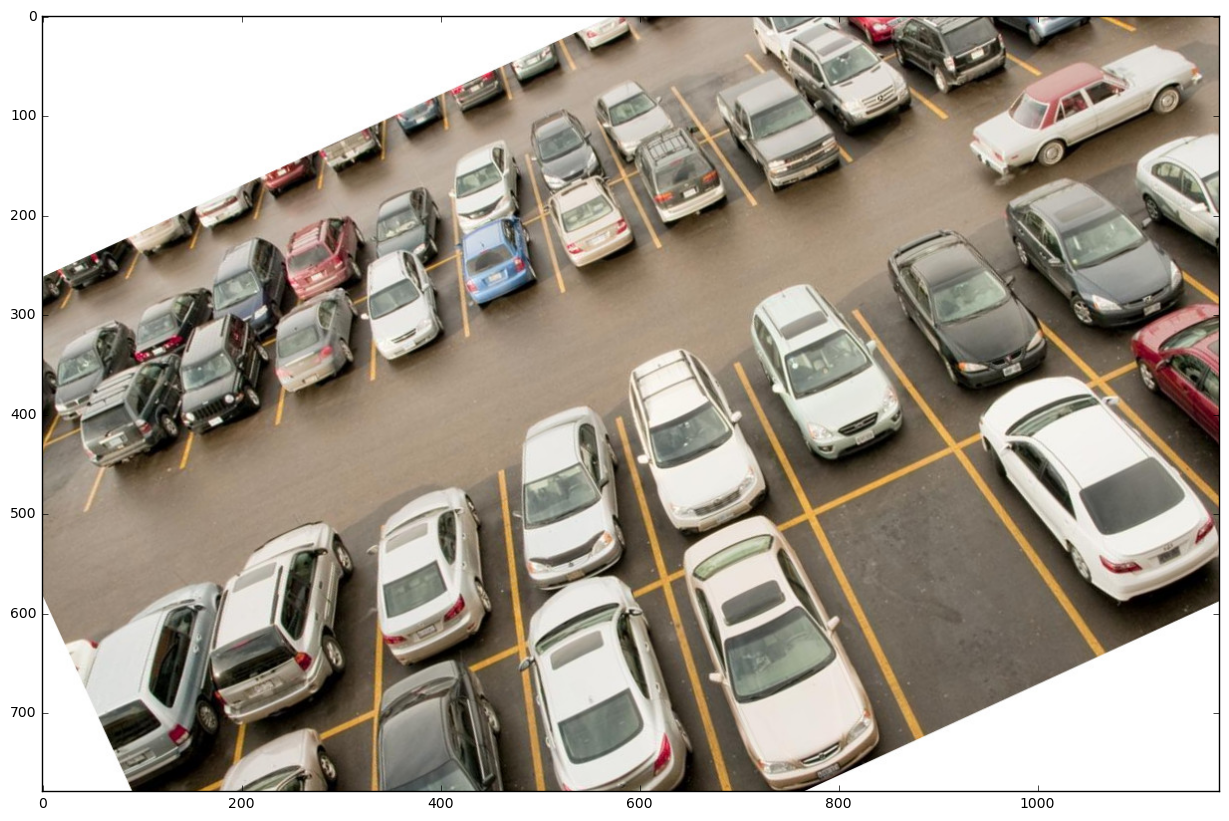

In [9]:
parking_lot_rotated_img = cv2.imread("parking_space_1_rotated.jpg")
parking_lot_rotated_img = cv2.cvtColor(parking_lot_rotated_img,cv2.COLOR_BGR2RGB)
rcParams['figure.figsize'] = 20, 10
plt.imshow(parking_lot_rotated_img)


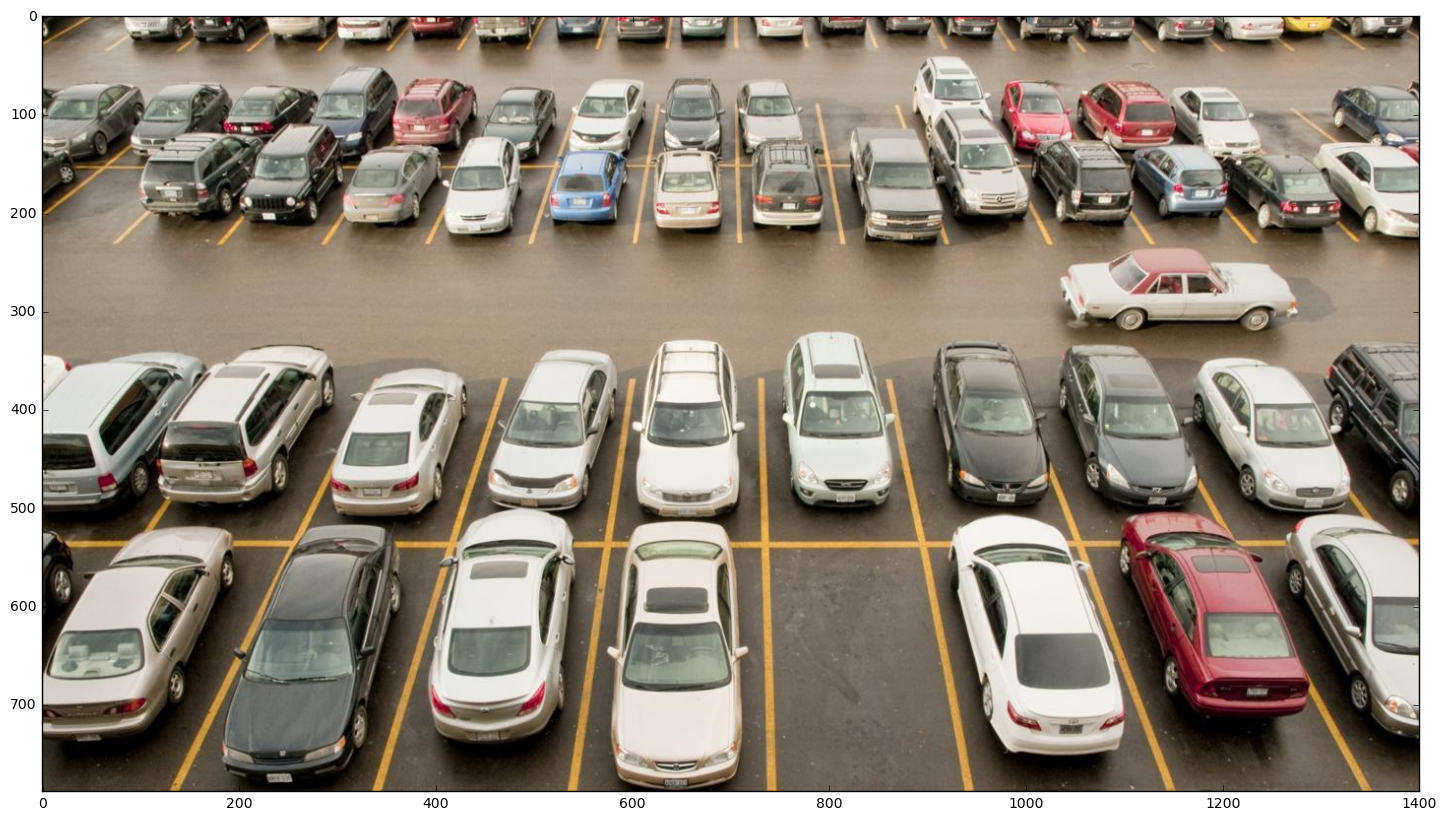

In [10]:
parking_lot_img = cv2.imread("parking_space_1.jpg")
parking_lot_img = cv2.cvtColor(parking_lot_img,cv2.COLOR_BGR2RGB)
rcParams['figure.figsize'] = 20, 10
plt.imshow(parking_lot_img)

In [11]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

base_img = cv2.cvtColor(parking_lot_img, cv2.COLOR_BGR2GRAY)
rotated_img = cv2.cvtColor(parking_lot_rotated_img, cv2.COLOR_BGR2GRAY)

# Initiate SIFT detector
orb = cv2.AKAZE_create()

# find the keypoints and descriptors with SIFT
kp1, des1 = orb.detectAndCompute(base_img,None)
kp2, des2 = orb.detectAndCompute(rotated_img,None)

print("keypoints: {}, descriptors: {}".format(len(kp1), des1.shape))
print("keypoints: {}, descriptors: {}".format(len(kp2), des2.shape))    


FLANN_INDEX_LSH = 6
index_params = dict(algorithm=FLANN_INDEX_LSH,
                            table_number=6,
                            key_size=12,
                            multi_probe_level=1)
search_params = dict(checks=50)
flann_matcher = cv2.FlannBasedMatcher(index_params, search_params)
matches = flann_matcher.knnMatch(des1, des2, k=2)
good_matches = [m for m, n in matches if m.distance < 0.5 * n.distance]
print("num of good matched: {}".format(len(good_matches)))    

keypoints: 5983, descriptors: (5983, 61)
keypoints: 4487, descriptors: (4487, 61)
num of good matched: 3198


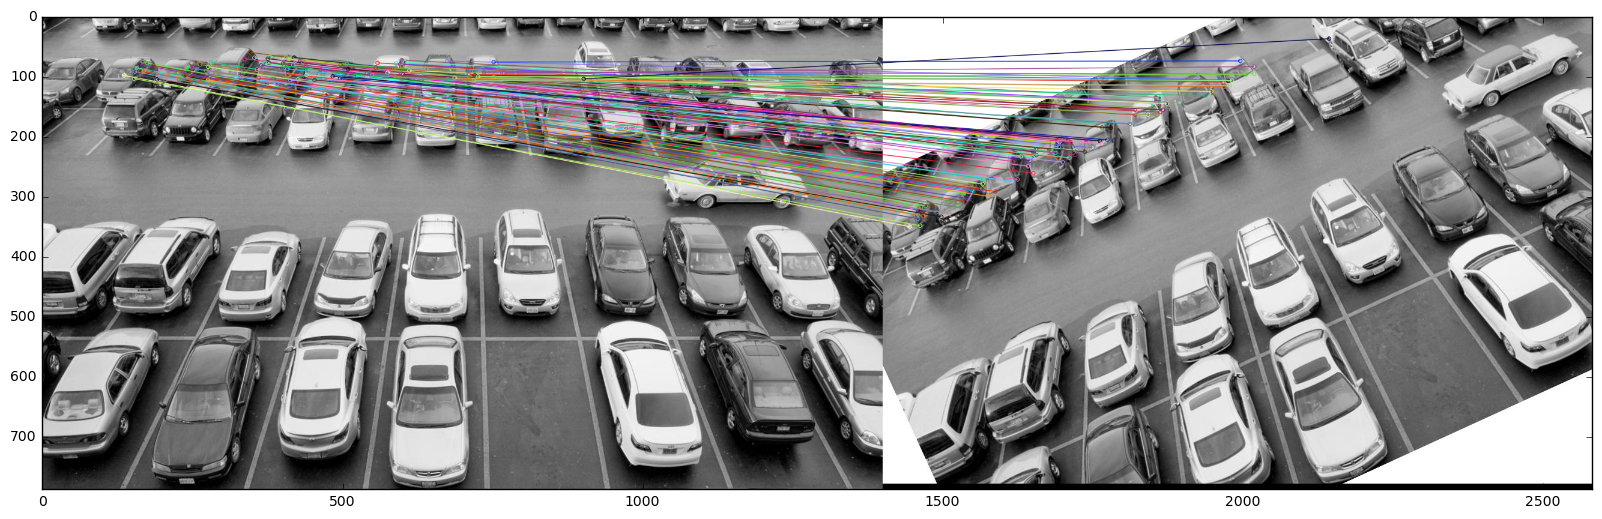

In [12]:
good_matches_set = [[m] for m in good_matches]

matching_img = cv2.drawMatchesKnn(base_img, kp1, rotated_img, kp2, good_matches_set[1:100], None, flags=2)
rcParams['figure.figsize'] = 20, 10
plt.imshow(matching_img)

In [13]:
base_image_pts = np.float32([kp1[m.queryIdx].pt for m in good_matches]).reshape(-1, 1, 2)
rotated_image_pts = np.float32([kp2[m.trainIdx].pt for m in good_matches]).reshape(-1, 1, 2)
# calculate homography matrices
forward_H, _ = cv2.findHomography(rotated_image_pts,base_image_pts, cv2.RANSAC, 3.0)
print forward_H

[[  9.09214394e-01  -4.16231033e-01   2.41685705e+02]
 [  4.16314010e-01   9.09505534e-01  -2.38977152e+02]
 [ -5.72141211e-07   4.06326466e-07   1.00000000e+00]]


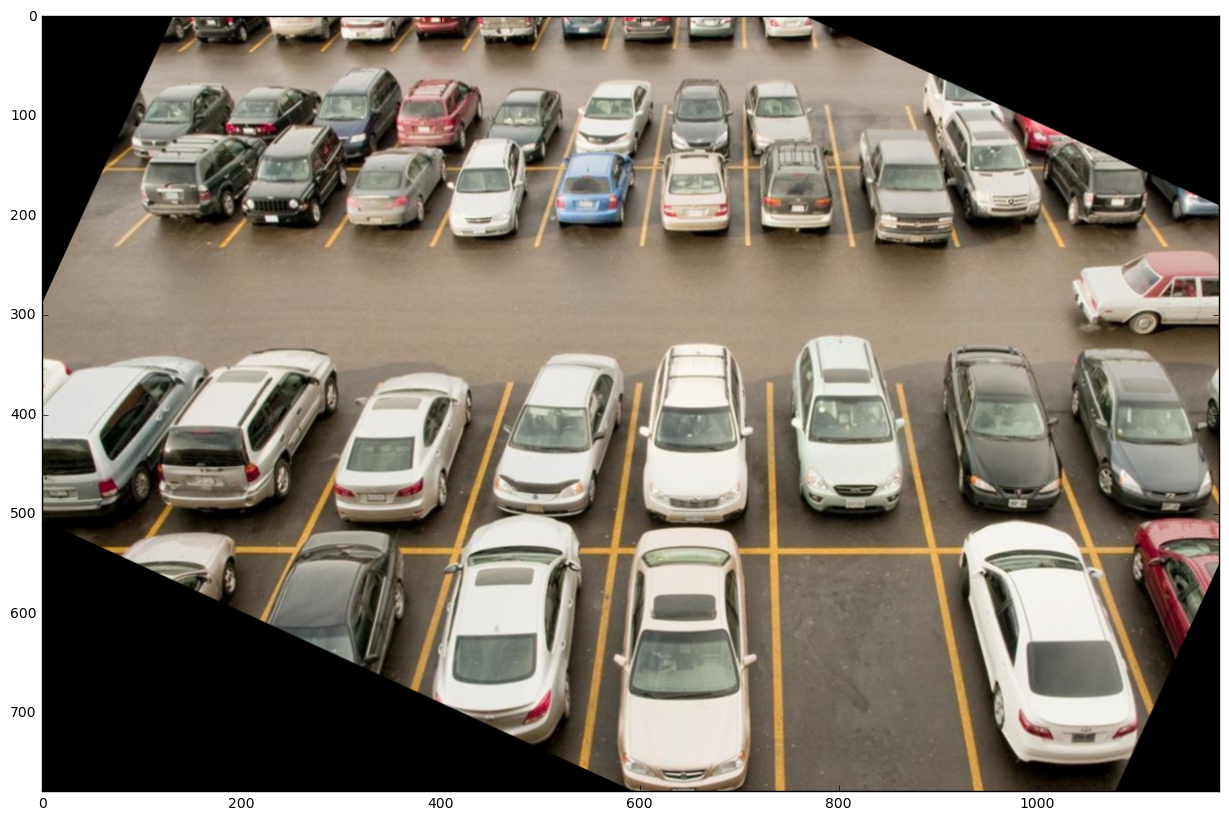

In [14]:
height, width, _ = parking_lot_rotated_img.shape
corrected_image = cv2.warpPerspective(parking_lot_rotated_img, forward_H, (width, height))
plt.imshow(corrected_image)